In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

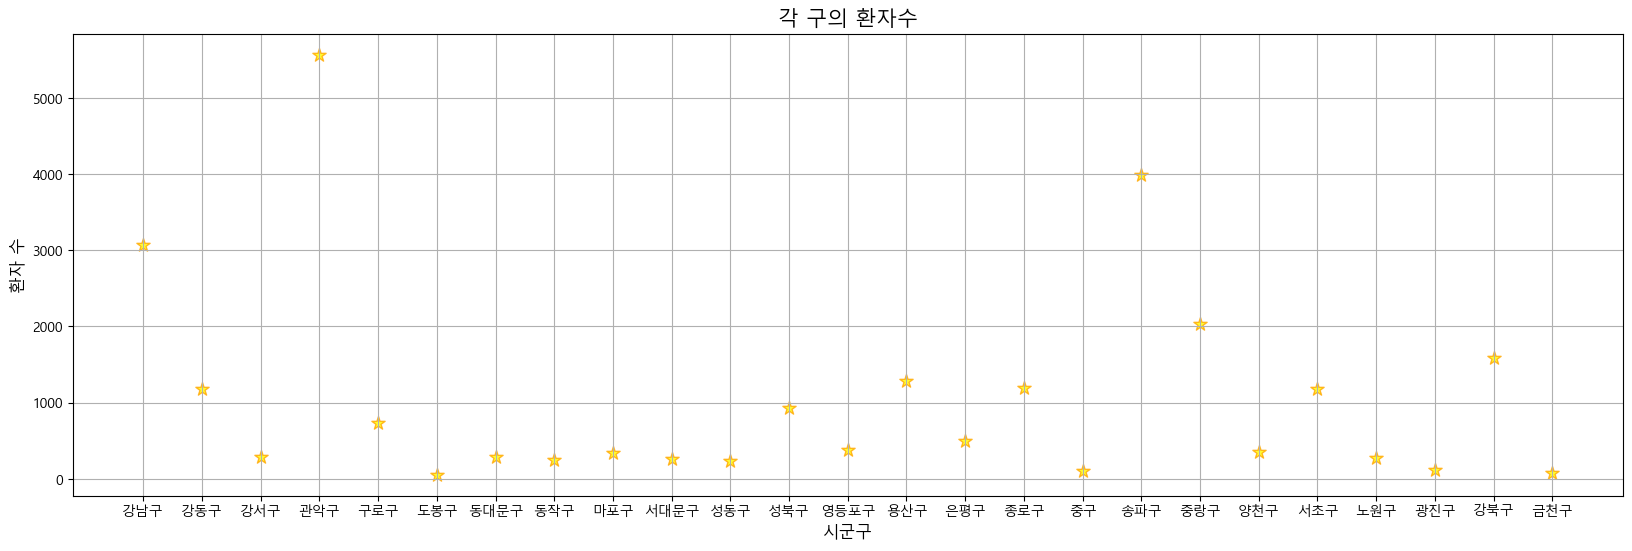

In [11]:
import csv
import matplotlib.pyplot as plt

# CSV 파일 열기
f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

# 헤더 건너뛰기
header = next(data)

# 서울의 각 구별 환자수 저장
gu = []
patient = []

for row in data:
    if '서울' in row[1]:  
        gu.append(row[2])  
        patient.append(int(row[5]))  

patient_sum = []
gu_combined = []

for i in range(0, len(patient), 2):  # 2씩 증가하도록 수정
    if i + 1 < len(patient):  # IndexError 방지
        patient_sum.append(patient[i] + patient[i+1])  # 두 개씩 합산
        gu_combined.append(gu[i])  # 구 이름 추가
f.close()

# 점 그래프 그리기
plt.figure(figsize=(20, 6))  # 그래프 크기 설정
plt.scatter(gu_combined, patient_sum, s=100, color='yellow',marker='*',alpha=0.8, edgecolors='orange')  # 점 그래프 생성
plt.title('각 구의 환자수', fontsize=15)
plt.xlabel('시군구', fontsize=12)
plt.ylabel('환자 수', fontsize=12) 
plt.grid(True)  # 격자 추가
plt.show()

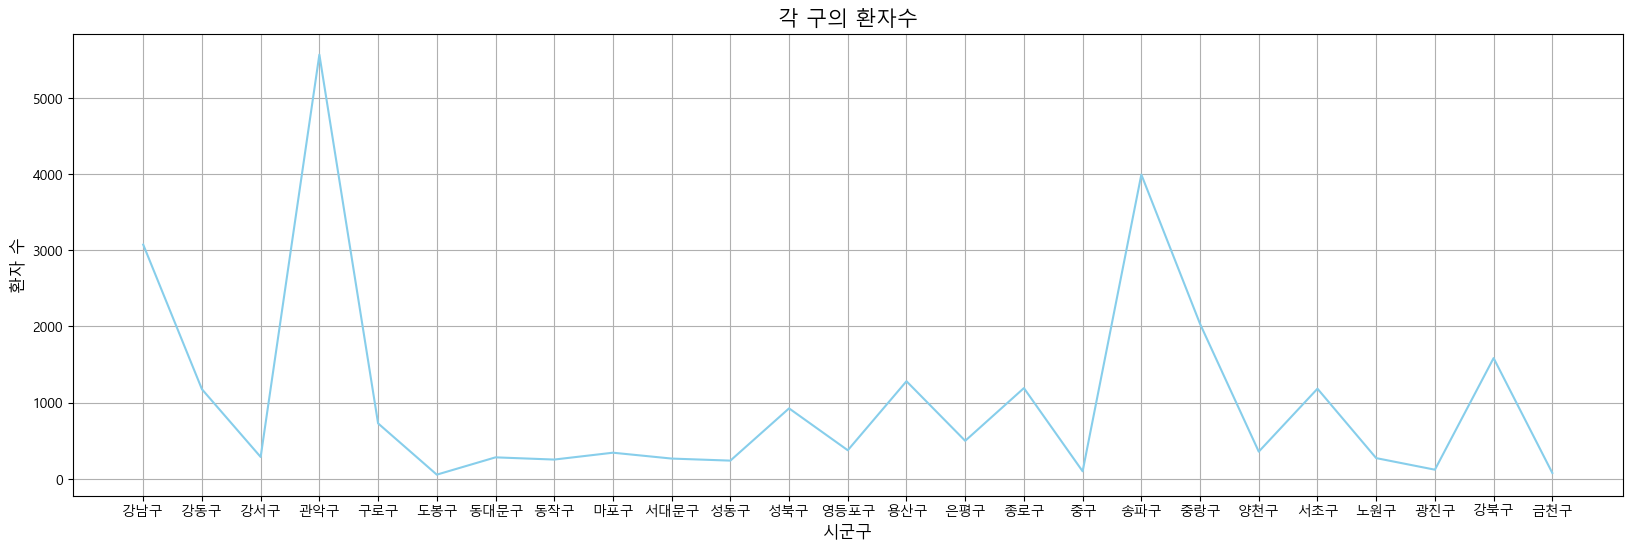

In [12]:
import csv
import matplotlib.pyplot as plt

# CSV 파일 열기
f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

# 헤더 건너뛰기
header = next(data)

# 서울의 각 구별 환자수 저장
gu = []
patient = []

for row in data:
    if '서울' in row[1]:  
        gu.append(row[2])  
        patient.append(int(row[5]))  

patient_sum = []
gu_combined = []

for i in range(0, len(patient), 2):  # 2씩 증가하도록 수정
    if i + 1 < len(patient):  # IndexError 방지
        patient_sum.append(patient[i] + patient[i+1])  # 두 개씩 합산
        gu_combined.append(gu[i])  # 구 이름 추가
f.close()


plt.figure(figsize=(20, 6)) 
plt.plot(gu_combined, patient_sum, color='skyblue')  
plt.title('각 구의 환자수', fontsize=15)
plt.xlabel('시군구', fontsize=12)
plt.ylabel('환자 수', fontsize=12) 
plt.grid(True)  
plt.show()

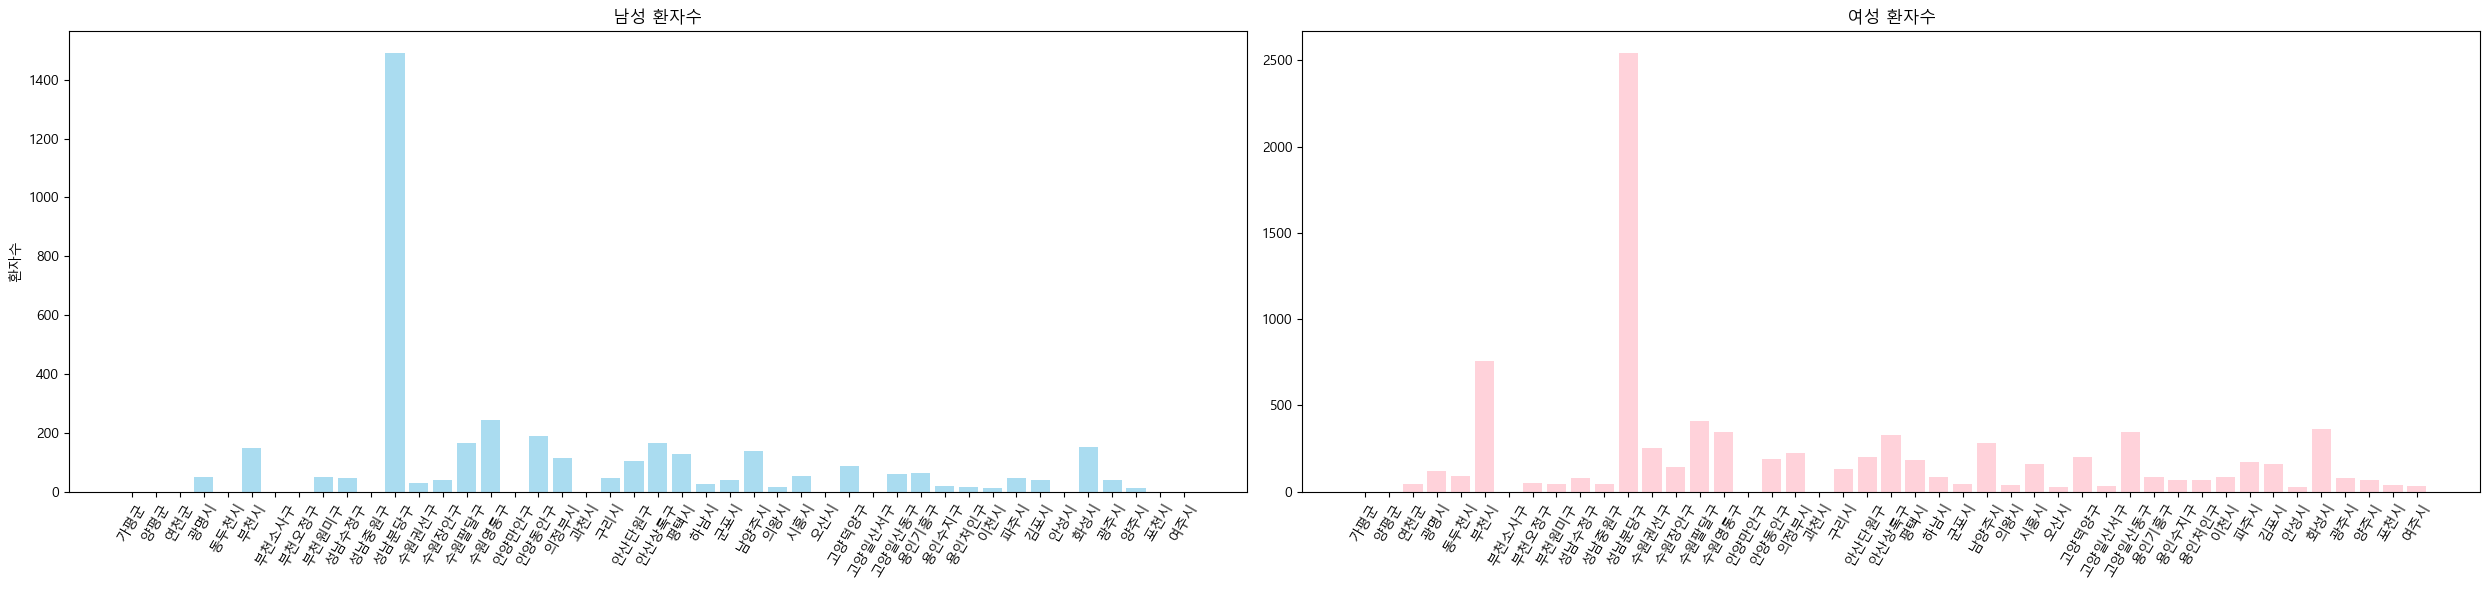

In [4]:
import csv
import matplotlib.pyplot as plt

# CSV 파일 열기
f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

# 헤더 건너뛰기
header = next(data)

# 서울의 각 구별 환자수 저장
gu = []
patient = []

for row in data:
    if '경기' in row[1]:  
        gu.append(row[2])  # 시군구 추가
        patient.append(int(row[5]))  # 환자수 추가

patient_male = []
patient_female = []
gu_combined = []

for i in range(0, len(patient), 2):  # 2씩 증가하도록 수정
    if i + 1 < len(patient):  # IndexError 방지
        patient_male.append(patient[i])
        patient_female.append(patient[i+1])
        gu_combined.append(gu[i])  # 구 이름 추가
f.close()

# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(25, 6))  # 가로로 2개의 subplot, y축 공유

# 남성 환자수
axes[0].bar(gu_combined, patient_male, color='skyblue', alpha=0.7)
axes[0].set_title('남성 환자수')
axes[0].set_ylabel('환자수')
axes[0].tick_params(axis='x', rotation=60)

# 여성 환자수
axes[1].bar(gu_combined, patient_female, color='pink', alpha=0.7)
axes[1].set_title('여성 환자수')
axes[1].tick_params(axis='x', rotation=60)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

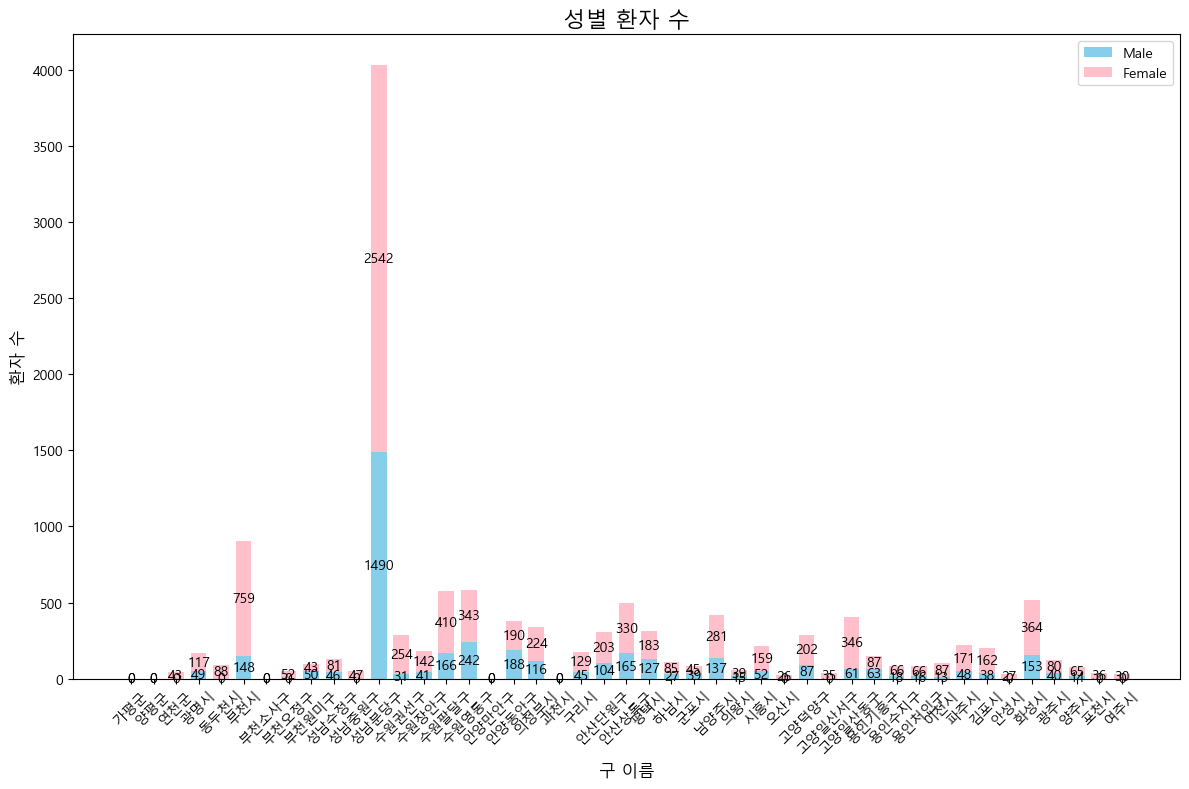

In [5]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 열기
f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

# 헤더 건너뛰기
header = next(data)

# 서울의 각 구별 환자수 저장
gu = []
patient = []

for row in data:
    if '경기' in row[1]: 
        gu.append(row[2])  # 시군구 추가
        patient.append(int(row[5]))  # 환자수 추가

f.close()

# 남성과 여성 환자수 분리
patient_male = []
patient_female = []
gu_combined = []

for i in range(0, len(patient), 2):  # 2씩 증가하도록 수정
    if i + 1 < len(patient):  # IndexError 방지
        patient_male.append(patient[i])
        patient_female.append(patient[i + 1])
        gu_combined.append(gu[i])  # 구 이름 추가

# 데이터 준비
species = gu_combined
sex_counts = {
    'Male': np.array(patient_male),
    'Female': np.array(patient_female),
}
width = 0.7  # 막대 폭 설정

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(len(species))  # 초기 바텀 값 설정

# 색 변경: 남성은 'blue', 여성은 'pink'로 설정
for sex, sex_count in sex_counts.items():
    if sex == 'Male':
        color = 'skyblue'  # 남성은 파란색
    else:
        color = 'pink'  # 여성은 분홍색
        
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom, color=color)
    bottom += sex_count  # 각 성별의 값을 쌓아 올리기

    # 막대 내부에 값 표시
    ax.bar_label(p, label_type='center')

# 그래프 꾸미기
ax.set_title('성별 환자 수', fontsize=16)
ax.set_ylabel('환자 수', fontsize=12)
ax.set_xlabel('구 이름', fontsize=12)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


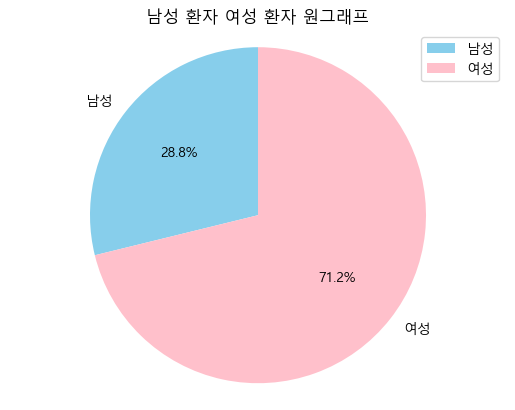

In [6]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 열기
f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

# 헤더 건너뛰기
header = next(data)

# 서울의 각 구별 환자수 저장
gu = []
patient = []

for row in data:
    if '서울' in row[1]:  # 시도가 "서울"인 경우
        gu.append(row[2])  # 시군구 추가
        patient.append(int(row[5]))  # 환자수 추가

f.close()

# 남성과 여성 환자수 분리
patient_male = []
patient_female = []
gu_combined = []

for i in range(0, len(patient), 2):  # 2씩 증가하도록 수정
    if i + 1 < len(patient):  # IndexError 방지
        patient_male.append(patient[i])
        patient_female.append(patient[i + 1])
        gu_combined.append(gu[i])  # 구 이름 추가

# 남성 환자수와 여성 환자수 총합 계산
total_male = sum(patient_male)
total_female = sum(patient_female)


labels = ['남성', '여성']
data = [total_male, total_female]
colors = ['skyblue', 'pink']

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)


# 원이 정원 형태로 나오게 설정
ax.axis('equal')

# 제목 설정
ax.set_title('남성 환자 여성 환자 원그래프')

# 그래프 출력
plt.legend()
plt.show()


In [7]:
import csv

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

result = []
for row in data :
    if '서울' in row[1] and '강동구' in row[2] :
            result.append(int(row[5]))

f.close()
print(result[0]+ result[1],"명")

1176 명


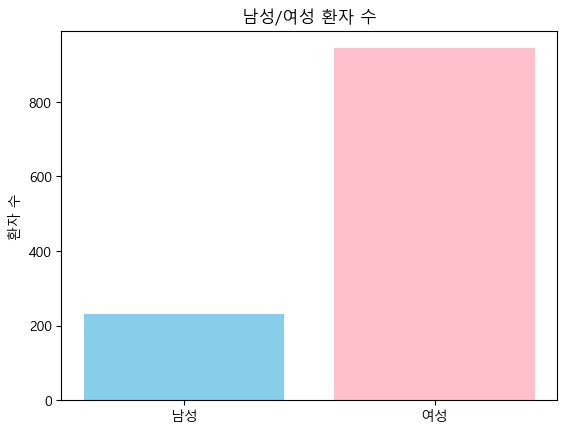

In [8]:
import csv

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

result = []
for row in data :
    if '서울' in row[1] and '강동구' in row[2] :
            result.append(int(row[5]))

f.close()

labels = ['남성', '여성']

plt.bar(labels, result, color=['skyblue', 'pink'])
plt.title('남성/여성 환자 수')
plt.ylabel('환자 수')
plt.show()

In [9]:
import csv
import matplotlib.pyplot as plt

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)


city = input('시도를 입력하시오: ')
#ex)서울
gu = input('시군구를 입력하시오: ')
#ex)서대문구

filtered_data = []
for row in data:
    if city == row[1] and gu == row[2]:  # 올바른 조건 설정
        filtered_data.append(row)


# 필터링된 데이터 출력
if filtered_data:
    print("필터링된 데이터:")
    for row in filtered_data:
        print(row)
else:
    print(f"{city}의 {gu}에 해당하는 데이터가 없습니다.")

# 파일 닫기
f.close()

필터링된 데이터:
['2023', '서울', '서대문구', '남', '36', '96', '19725110']
['2023', '서울', '서대문구', '여', '71', '170', '9380530']


In [10]:
import csv
import matplotlib.pyplot as plt

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)


city = input('시도를 입력하시오: ')
#ex)서울
gu = input('시군구를 입력하시오: ')
#ex)서대문구

filtered_data = []
for row in data:
    if city == row[1] and gu == row[2]:  # 올바른 조건 설정
        filtered_data.append(row[5])


# 필터링된 데이터 출력
if filtered_data:
    print("남자 : ", filtered_data[0], '명, 여자 : ', filtered_data[1],'명')
else:
    print(f"{city}의 {gu}에 해당하는 데이터가 없습니다.")

# 파일 닫기
f.close()

남자 :  96 명, 여자 :  170 명


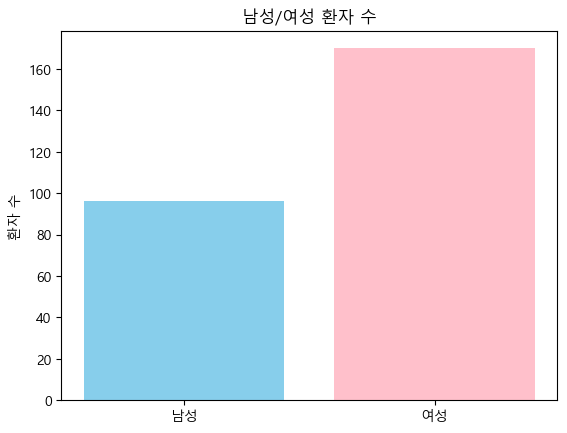

In [64]:
import csv
import matplotlib.pyplot as plt

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)


city = input('시도를 입력하시오: ')
#ex)서울
gu = input('시군구를 입력하시오: ')
#ex)서대문구

filtered_data = []
for row in data:
    if city == row[1] and gu == row[2]:  # 올바른 조건 설정
        filtered_data.append(row[5])

male = int(filtered_data[0])
female = int(filtered_data[1])
 
result = [male, female]
lables = ['남성', '여성']

plt.bar(labels,result, color=['skyblue', 'pink'])
plt.title('남성/여성 환자 수')
plt.ylabel('환자 수')
plt.show()


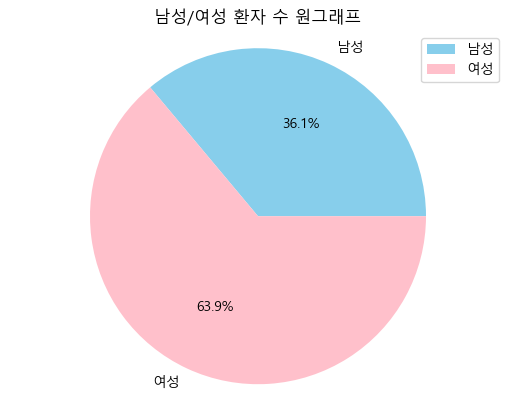

In [68]:
import csv
import matplotlib.pyplot as plt

f = open('obesity2023_2.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)


city = input('시도를 입력하시오: ')
#ex)서울
gu = input('시군구를 입력하시오: ')
#ex)서대문구

filtered_data = []
for row in data:
    if city == row[1] and gu == row[2]:  # 올바른 조건 설정
        filtered_data.append(row[5])

male = int(filtered_data[0])
female = int(filtered_data[1])
 
result = [male, female]
lables = ['남성', '여성']

fig, ax = plt.subplots()
ax.pie(result, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'pink'])


# 원이 정원 형태로 나오게 설정
ax.axis('equal')

# 제목 설정
ax.set_title('남성/여성 환자 수 원그래프')

# 그래프 출력
plt.legend()
plt.show()